<a href="https://colab.research.google.com/github/rgmantovani/advancedML/blob/master/codes/aula_08_ds_flow/DAES_CNN_exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exemplo: CNN pré-treinada usando Denoising AutoEncoder

COLAB: "Go to Runtime > Change runtime and select a GPU hardware accelerator."

In [2]:
# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [54]:
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [55]:
[X_train, y_train], [X_test, y_test] = keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test  = X_test / 255

In [56]:
# Criar externamente imagens com ruidos
n_images = len(X_train)
X_train_noisy = X_train + np.random.randn(n_images, 32, 32, 3) * 0.1

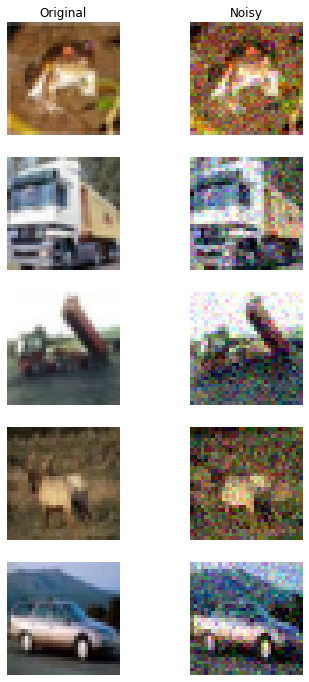

In [57]:
n_images = 5

plt.figure(figsize=(6, 12))
for index in range(n_images):
    plt.subplot(n_images, 2, index * 2 + 1)
    plt.imshow(X_train[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 2, index * 2 + 2)
    plt.imshow(np.clip(X_train_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
plt.show()

In [59]:
denoising_encoder = keras.models.Sequential(
    name = "dae_encoder",
    layers=[ 
      keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape=[32,32,3]),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(512, activation="relu"),
])
denoising_encoder.summary()

Model: "dae_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               4194816   
Total params: 4,195,712
Trainable params: 4,195,712
Non-trainable params: 0
_________________________________________________________________


In [60]:
denoising_decoder = keras.models.Sequential(
    name = "dae_decodder",
    layers=[keras.layers.Dense(16 * 16 * 32, activation="relu", input_shape=[512]),
      keras.layers.Reshape([16, 16, 32]),
      keras.layers.Conv2DTranspose(filters=3, kernel_size=3, strides=2,
                                 padding="same", activation="sigmoid")
])
denoising_decoder.summary()

Model: "dae_decodder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8192)              4202496   
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 3)         867       
Total params: 4,203,363
Trainable params: 4,203,363
Non-trainable params: 0
_________________________________________________________________


In [61]:
denoising_ae = keras.models.Sequential(
    name = "dae",
    layers = [denoising_encoder, denoising_decoder])

denoising_ae.summary()

Model: "dae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dae_encoder (Sequential)     (None, 512)               4195712   
_________________________________________________________________
dae_decodder (Sequential)    (None, 32, 32, 3)         4203363   
Total params: 8,399,075
Trainable params: 8,399,075
Non-trainable params: 0
_________________________________________________________________


In [75]:
my_epochs = 10

In [76]:
denoising_ae.compile(loss="binary_crossentropy", 
    optimizer=keras.optimizers.Nadam(),
    metrics=["mse"])

history = denoising_ae.fit(
    x=X_train_noisy, 
    y=X_train, 
    epochs=my_epochs, 
    validation_data=(X_test, X_test)
)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.5629 - mse: 0.0063 - val_loss: 0.5652 - val_mse: 0.0066
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5628 - mse: 0.0060 - val_loss: 0.5643 - val_mse: 0.0062
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5611 - mse: 0.0058 - val_loss: 0.5635 - val_mse: 0.0059
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5619 - mse: 0.0056 - val_loss: 0.5637 - val_mse: 0.0060
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5613 - mse: 0.0056 - val_loss: 0.5631 - val_mse: 0.0058
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5612 - mse: 0.0056 - val_loss: 0.5636 - val_mse: 0.0059
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.5606 - mse: 0.0055 - val_loss: 0.5629 - val_mse: 0.0057
Epoch 8/10
1563/1563 [==========================

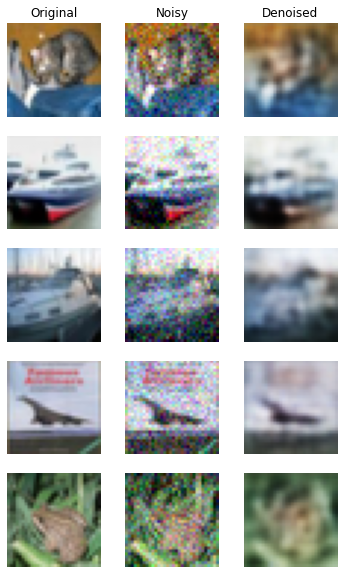

In [77]:
n_images = 5
new_images = X_test[:n_images]
new_images_noisy = new_images + np.random.randn(n_images, 32, 32, 3) * 0.1
new_images_denoised = denoising_ae.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()

---
CNN 1 - Com pré-treino

In [78]:
# lista com os pesos de cada camada
dae_ws = denoising_encoder.get_weights()
print(len(dae_ws))
print(dae_ws[0].shape)
print(dae_ws[1].shape)
print(dae_ws[2].shape)
print(dae_ws[3].shape)

4
(3, 3, 3, 32)
(32,)
(8192, 512)
(512,)


In [79]:
cnn1 = keras.models.Sequential(
    name = "cnn_pretrained",
    layers = [
      keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(512, activation="relu")
])
cnn1.summary()

Model: "cnn_pretrained"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               4194816   
Total params: 4,195,712
Trainable params: 4,195,712
Non-trainable params: 0
_________________________________________________________________


In [80]:
# inicializando os pesos já treinados anteriormente
cnn1.set_weights(dae_ws)

In [81]:
# adicionando camadas densas no final do modelo
cnn1.add(tf.keras.layers.Dense(10, activation='sigmoid'))
cnn1.summary()

Model: "cnn_pretrained"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 4,200,842
Trainable params: 4,200,842
Non-trainable params: 0
_________________________________________________________________


---
CNN 2 - Sem pré-treino

In [82]:
cnn2 = keras.models.Sequential(
    name = "cnn_not_pretrained",
    layers = [keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(512, activation="relu"),
      keras.layers.Dense(10, activation="sigmoid")
])
cnn2.summary()

Model: "cnn_not_pretrained"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 4,200,842
Trainable params: 4,200,842
Non-trainable params: 0
_________________________________________________________________


In [83]:
# selecionar aleatoriamente 5000 exemplos do treino
ids = random.sample(population=range(len(X_train)), k=5000)

X_train_subsample = X_train[ids]
y_train_subsample = y_train[ids]

print(X_train_subsample.shape)
print(y_train_subsample.shape)

(5000, 32, 32, 3)
(5000, 1)


In [92]:
#from sklearn.model_selection import StratifiedShuffleSplit
#sss = StratifiedShuffleSplit(n_splits=10, test_size=0.5, random_state=0)
# print(sss.get_n_splits(X, y))
#print(sss.shape)

AttributeError: ignored

In [84]:
cnn1.compile(loss="sparse_categorical_crossentropy", 
                     optimizer=keras.optimizers.Nadam(),
                     metrics=["accuracy"])

cnn1_history = cnn1.fit(
    x = X_train_subsample, 
    y = y_train_subsample, 
    epochs = my_epochs,
    # validation_split = 0.3
)

Epoch 1/10
157/157 [==============================] - 2s 6ms/step - loss: 2.1960 - accuracy: 0.2276
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 1.5695 - accuracy: 0.4437
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 1.2976 - accuracy: 0.5527
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 1.0689 - accuracy: 0.6370
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.9545 - accuracy: 0.6702
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.7818 - accuracy: 0.7482
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.6336 - accuracy: 0.7951
Epoch 8/10
157/157 [==============================] - 1s 6ms/step - loss: 0.5820 - accuracy: 0.8222
Epoch 9/10
157/157 [==============================] - 1s 6ms/step - loss: 0.3941 - accuracy: 0.8838
Epoch 10/10
157/157 [==============================] - 1s 6ms/step - loss: 0.3026 - accuracy: 0.9189

In [85]:
cnn2.compile(loss="sparse_categorical_crossentropy", 
                     optimizer=keras.optimizers.Nadam(),
                     metrics=["accuracy"])

cnn2_history = cnn2.fit(
    x = X_train_subsample, 
    y = y_train_subsample, 
    epochs = my_epochs,
    # validation_split = 0.3
)

Epoch 1/10
157/157 [==============================] - 2s 6ms/step - loss: 2.1358 - accuracy: 0.2251
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 1.4507 - accuracy: 0.4869
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 1.2040 - accuracy: 0.5780
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.9811 - accuracy: 0.6631
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.8684 - accuracy: 0.7020
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.6859 - accuracy: 0.7835
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.5470 - accuracy: 0.8320
Epoch 8/10
157/157 [==============================] - 1s 6ms/step - loss: 0.4876 - accuracy: 0.8628
Epoch 9/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2977 - accuracy: 0.9109
Epoch 10/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2178 - accuracy: 0.9475

In [86]:
# predicoes CNN 1
prediction_cnn1 = np.argmax(cnn1.predict(X_test), axis=-1)
print(prediction_cnn1)

[3 8 8 ... 5 1 7]


In [87]:
# predicoes CNN 2
prediction_cnn2 = np.argmax(cnn2.predict(X_test), axis=-1)
print(prediction_cnn2)

[3 1 8 ... 3 1 7]


In [88]:
score_cnn1 = cnn1.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score_cnn1[0]} / Test accuracy: {score_cnn1[1]}')

score_cnn2 = cnn2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score_cnn2[0]} / Test accuracy: {score_cnn2[1]}')

Test loss: 1.7742093801498413 / Test accuracy: 0.5047000050544739
Test loss: 2.013212203979492 / Test accuracy: 0.4803999960422516
